In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [5]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [6]:
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [7]:
df.drop(["PassengerId","Name", "Ticket"], axis=1, inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
dtype = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtype": dtype, "Num_unique": n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,float64,object,object
Num_unique,2,3,2,88,7,7,248,147,3


In [10]:
cols = ['Pclass','Sex','SibSp','Parch','Embarked']
df[cols]= df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,int64,category,category,float64,category,category,float64,object,category


In [11]:
df.shape[0]

891

In [12]:
null = df.isnull().sum()
ratio = (null / df.shape[0])*100
pd.DataFrame({'Null_sum': null, "Ratio": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null_sum,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [13]:
df.drop('Cabin', axis=1, inplace=True)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    category
 5   Parch     891 non-null    category
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(5), float64(2), int64(1)
memory usage: 26.4 KB


<Axes: >

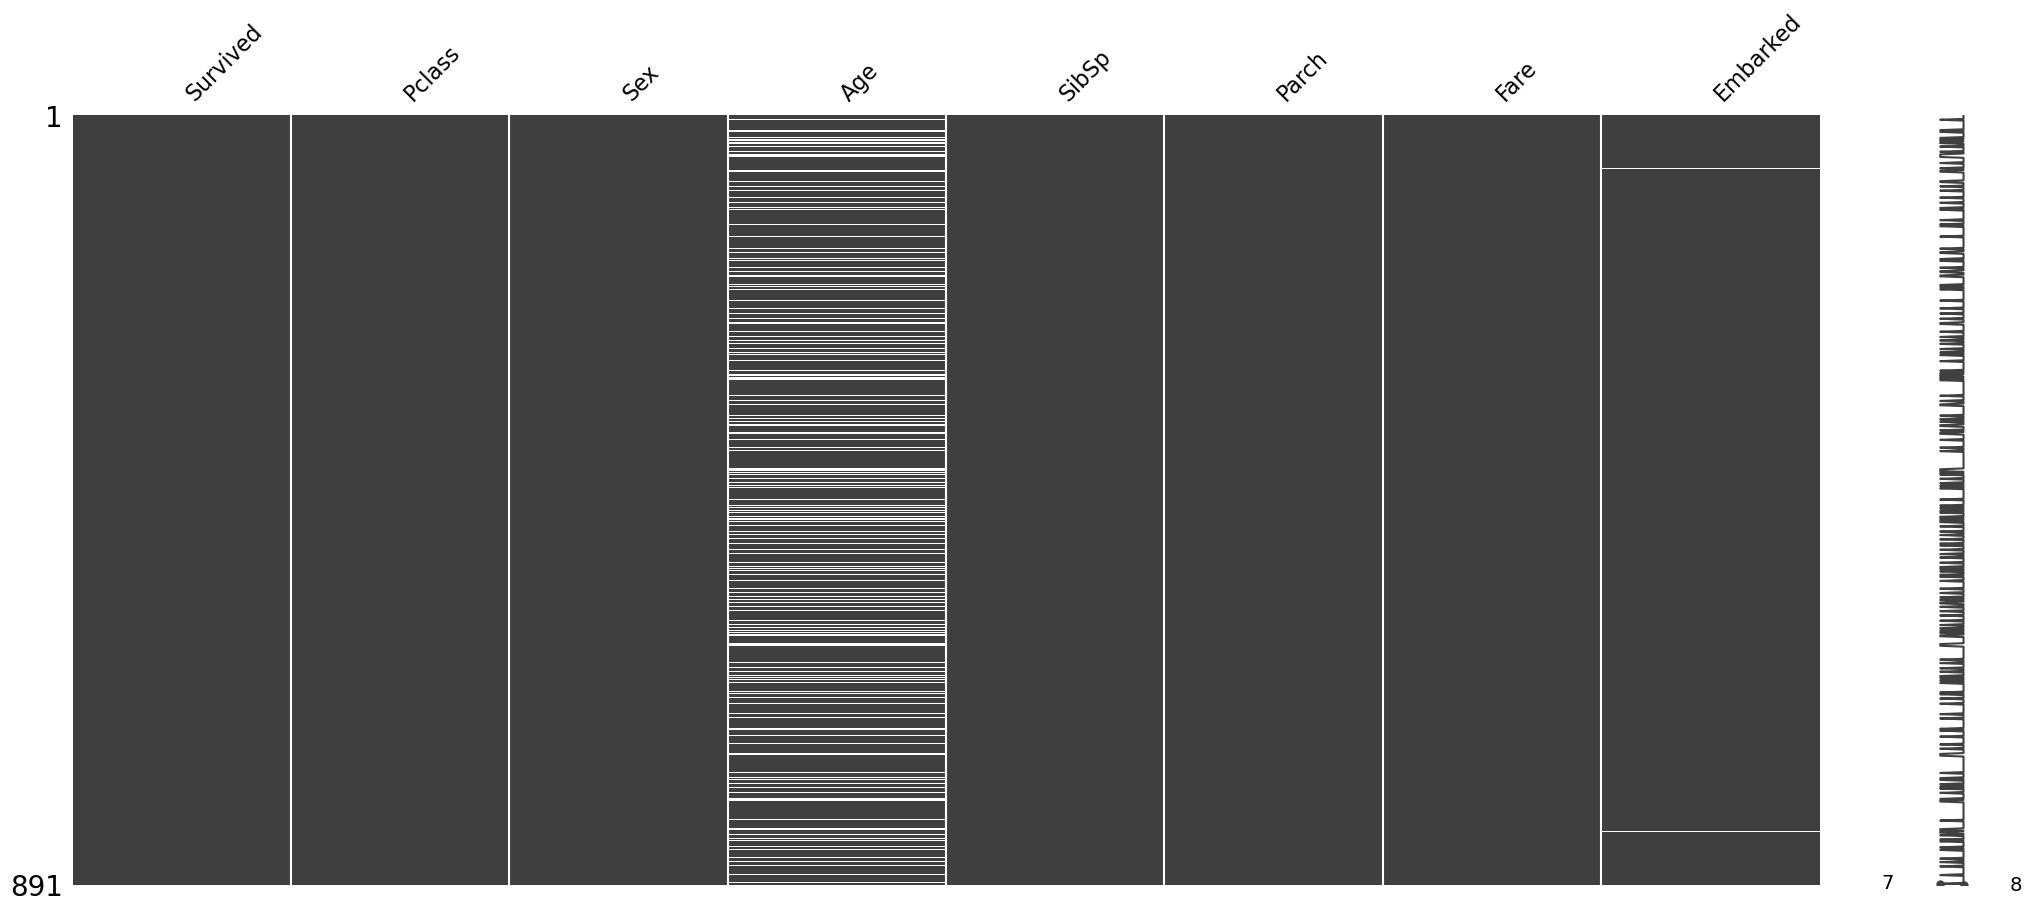

In [16]:
import missingno
missingno.matrix(df)

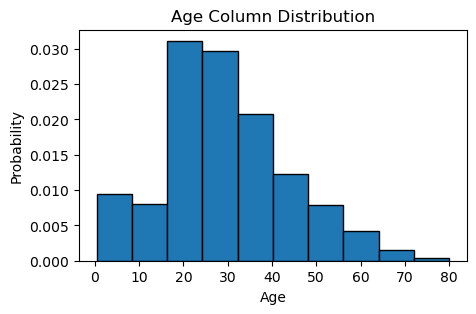

In [17]:
plt.figure(figsize=(5,3))
plt.hist(df['Age'], density=True, edgecolor = "black")
plt.title("Age Column Distribution")
plt.xlabel('Age')
plt.ylabel('Probability')
plt.show()

In [18]:
df = df.dropna(subset=['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
pd.DataFrame(df.isnull().sum()).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,177,0,0,0,0


In [20]:
df.describe()

,Survived,Age,Fare
count,889.000000,712.000000,889.000000
mean,0.382452,29.642093,32.096681
std,0.486260,14.492933,49.697504
min,0.000000,0.420000,0.000000
25%,0.000000,20.000000,7.895800
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [21]:
median= df.Age.median()
df.Age.fillna(median, inplace=True)
pd.DataFrame(df.isnull().sum()).T

C:\Users\DELL\AppData\Local\Temp\ipykernel_12680\460640822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age.fillna(median, inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,0,0,0,0,0


In [22]:
num_cols = df.select_dtypes("number").columns
num_cols= num_cols.drop('Survived')
num_cols

Index(['Age', 'Fare'], dtype='object')

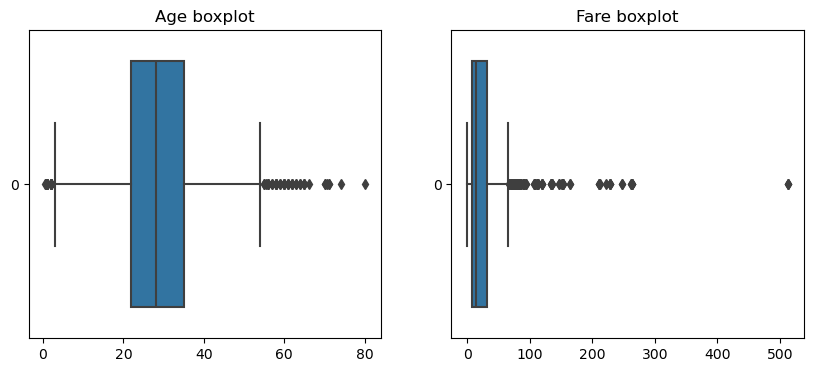

In [23]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

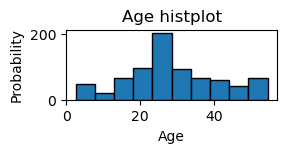

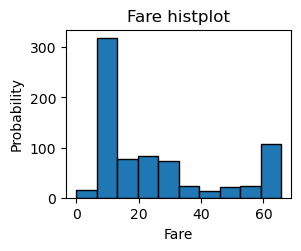

In [53]:
plt.figure(figsize=(6, 2))
for i, col in enumerate(num_cols):
    plt.subplot(2,2, i+1)
    plt.title(f"{col} histplot")
    plt.hist(df[col], edgecolor = "black")
    plt.xlabel(f"{col}")
    plt.ylabel('Probability')
    plt.show()

Text(0.5, 1.0, 'Age boxplot')

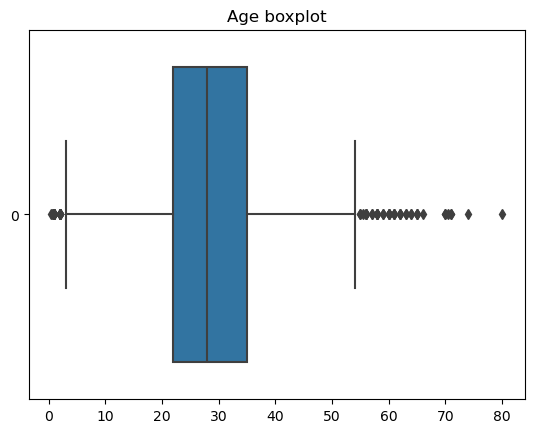

In [25]:
sns.boxplot(df['Age'], orient='h')
plt.title("Age boxplot")

Text(0.5, 1.0, 'Fare boxplot')

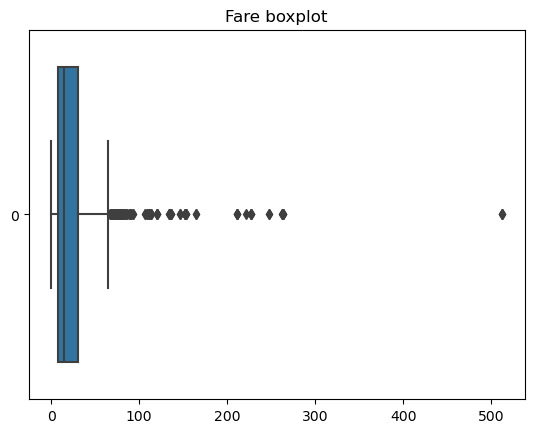

In [26]:
sns.boxplot(df['Fare'], orient='h')
plt.title("Fare boxplot")

In [54]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12680\1797019663.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12680\1797019663.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12680\1797019663.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [28]:
df.describe()

,Survived,Age,Fare
count,889.000000,889.000000,889.000000
mean,0.382452,29.000562,23.956061
std,0.486260,12.051609,20.414997
min,0.000000,2.500000,0.000000
25%,0.000000,22.000000,7.895800
50%,0.000000,28.000000,14.454200
75%,1.000000,35.000000,31.000000
max,1.000000,54.500000,65.656300


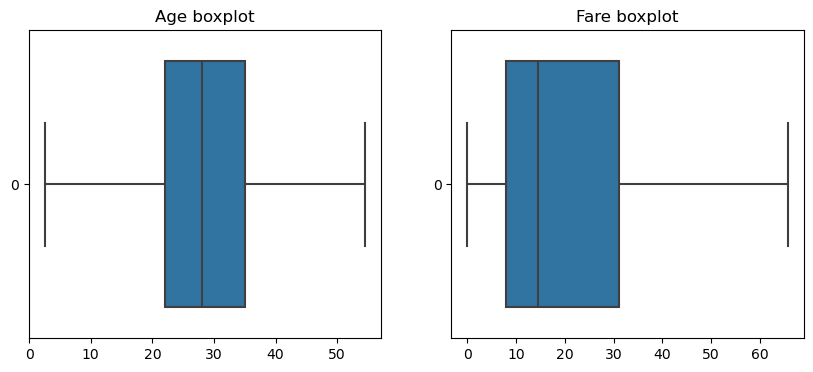

In [29]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

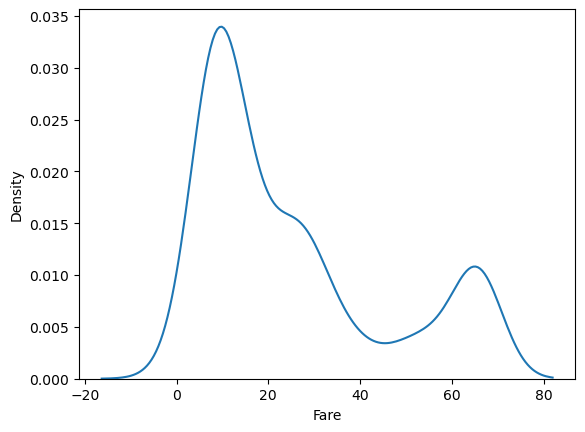

In [56]:
pd.option_context('mode.use_inf_as_na', True)
sns.kdeplot(df["Fare"])

In [31]:
cat_cols = df.select_dtypes("category").columns
cat_cols

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

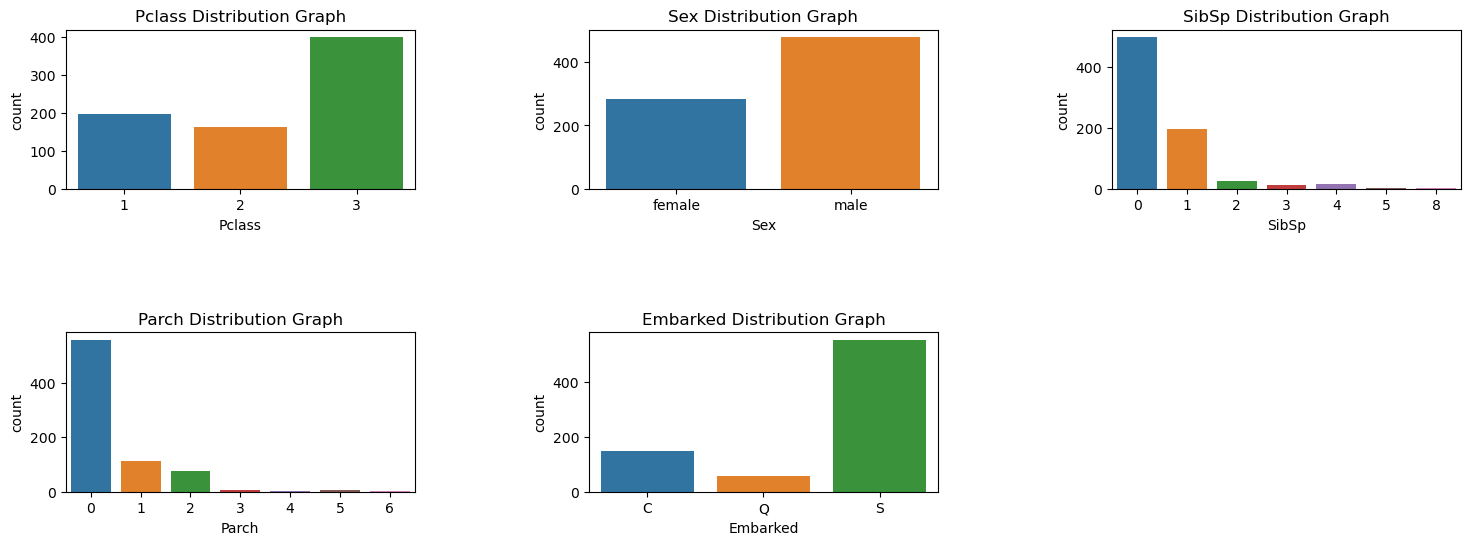

In [58]:
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize= (18,6))
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution Graph")
    plt.subplots_adjust(hspace= 
                    0.9, wspace=0.5)
plt.show()


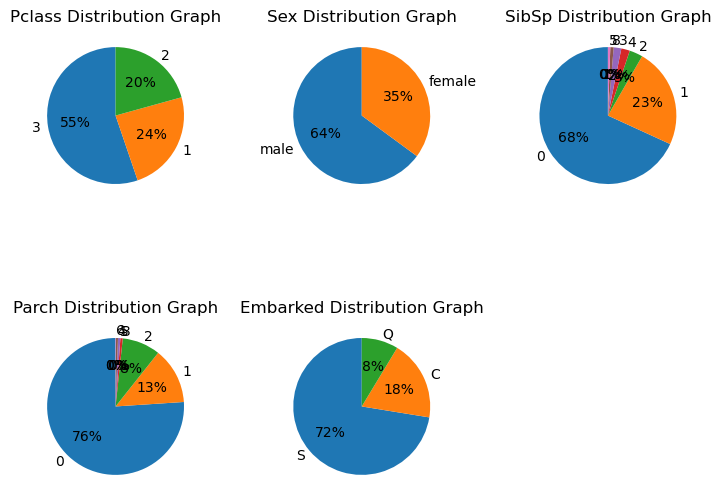

In [33]:
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize= (9,6))
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique = df[col].value_counts()
    #print(unique)
    count = unique.values
    categories = unique.index
    plt.pie(count,labels= categories, startangle= 90,autopct= '%1d%%' )
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()


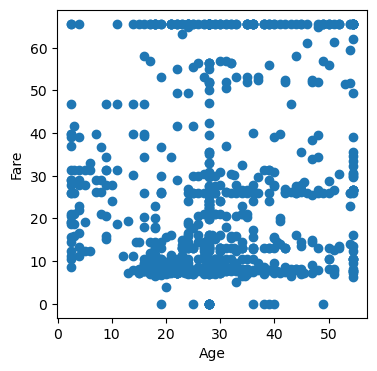

In [34]:
plt.figure(figsize=(4,4))
plt.scatter(df["Age"],df["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


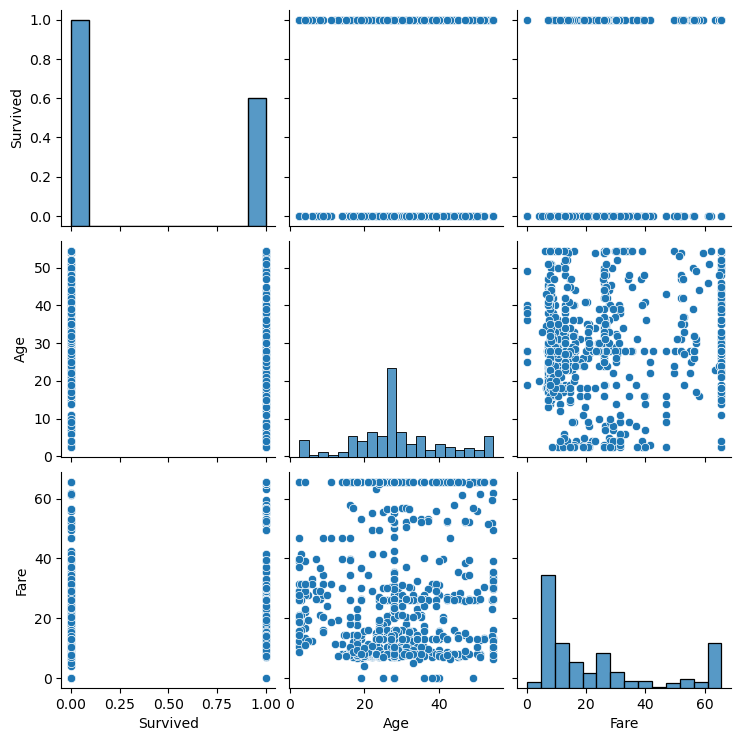

In [35]:
sns.pairplot(df)

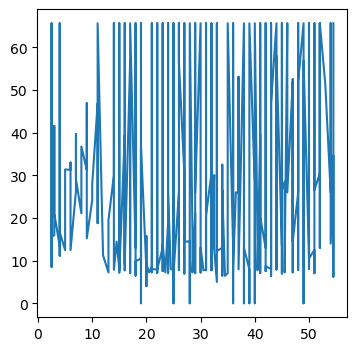

In [36]:
sorted_df = df.sort_values(by='Age')
#print(sorted_df)
plt.figure(figsize=(4,4))
plt.plot(sorted_df['Age'], sorted_df['Fare'])
plt.show()

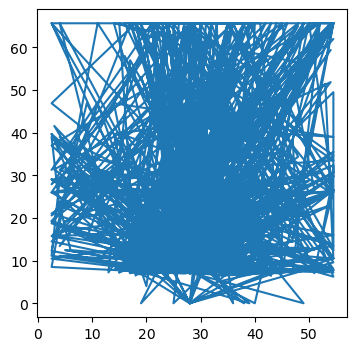

In [37]:
plt.figure(figsize=(4,4))
plt.plot(df['Age'], df['Fare'])
plt.show()

          Survived       Age      Fare
Survived  1.000000 -0.064988  0.313658
Age      -0.064988  1.000000  0.139065
Fare      0.313658  0.139065  1.000000


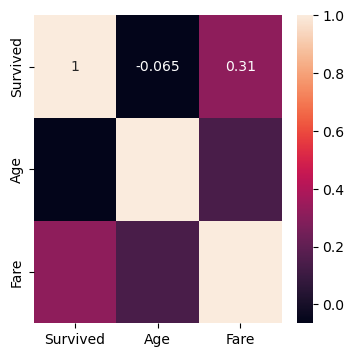

In [38]:
num_cols = df.select_dtypes("number")
##print(num_cols)
corr = num_cols.corr()
print(corr)
plt.figure(figsize=(4,4))
sns.heatmap(corr, annot=True)
plt.show()

Sex          female       male
Survived                      
0         25.660494  30.301282
1         28.413420  27.142202


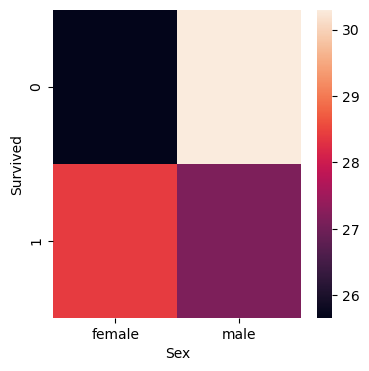

In [39]:
plt.figure(figsize=(4,4))
agg= df.pivot_table(index="Survived", columns="Sex", values="Age")
print(agg)
sns.heatmap(agg)
plt.show()

In [40]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6563,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [41]:
df.duplicated().sum()

129

In [42]:
df.drop_duplicates(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12680\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [43]:
df.duplicated().sum()

0

In [44]:
features = df.drop("Survived", axis=1)
label = df[["Survived"]]

In [45]:
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [46]:
label

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
887,1
888,0
889,1


In [47]:
from sklearn.preprocessing import MinMaxScaler
num_cols= features.select_dtypes("number").columns
scalar = MinMaxScaler()
scalar.fit(features[num_cols])
features[num_cols] = scalar.transform(features[num_cols])
features[num_cols] 


,Age,Fare
0,0.375000,0.110424
1,0.682692,1.000000
2,0.451923,0.120704
3,0.625000,0.808757
4,0.625000,0.122608
...,...,...
885,0.701923,0.443598
887,0.317308,0.456925
888,0.490385,0.357163
889,0.451923,0.456925


In [48]:
from sklearn.preprocessing import MinMaxScaler
num_cols= features.select_dtypes("number").columns
scalar = MinMaxScaler()
scalar.fit_transform(features[num_cols])

array([[0.375     , 0.11042352],
       [0.68269231, 1.        ],
       [0.45192308, 0.12070433],
       ...,
       [0.49038462, 0.35716298],
       [0.45192308, 0.45692493],
       [0.56730769, 0.11803894]])

In [49]:
cat_cols

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [50]:
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.375000,1,0,0.110424,S
1,1,female,0.682692,1,0,1.000000,C
2,3,female,0.451923,0,0,0.120704,S
3,1,female,0.625000,1,0,0.808757,S
4,3,male,0.625000,0,0,0.122608,S
...,...,...,...,...,...,...,...
885,3,female,0.701923,0,5,0.443598,Q
887,1,female,0.317308,0,0,0.456925,S
888,3,female,0.490385,1,2,0.357163,S
889,1,male,0.451923,0,0,0.456925,C


In [51]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = cat_cols, drop_invariant= True)
x= encoder.fit_transform(features)
x


,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Age,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_7,Fare,Embarked_1,Embarked_2,Embarked_3
0,1,0,0,1,0,0.375000,1,0,0,0,...,0,0,0,0,0,0,0.110424,1,0,0
1,0,1,0,0,1,0.682692,1,0,0,0,...,0,0,0,0,0,0,1.000000,0,1,0
2,1,0,0,0,1,0.451923,0,1,0,0,...,0,0,0,0,0,0,0.120704,1,0,0
3,0,1,0,0,1,0.625000,1,0,0,0,...,0,0,0,0,0,0,0.808757,1,0,0
4,1,0,0,1,0,0.625000,0,1,0,0,...,0,0,0,0,0,0,0.122608,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1,0,0,0,1,0.701923,0,1,0,0,...,0,0,1,0,0,0,0.443598,0,0,1
887,0,1,0,0,1,0.317308,0,1,0,0,...,0,0,0,0,0,0,0.456925,1,0,0
888,1,0,0,0,1,0.490385,1,0,0,0,...,0,1,0,0,0,0,0.357163,1,0,0
889,0,1,0,1,0,0.451923,0,1,0,0,...,0,0,0,0,0,0,0.456925,0,1,0


In [52]:
from category_encoders import OneHotEncoder
encoder1 = OneHotEncoder(features[["Sex", "Embarked","Pclass"]], drop_invariant= True)
X= encoder1.fit_transform(features[["Sex", "Embarked","Pclass"]])
features= pd.concat([features,X], axis=1)
features=features.drop(["Sex", "Embarked"], axis=1)
features



,Pclass,Age,SibSp,Parch,Fare,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3,Pclass_1,Pclass_2,Pclass_3
0,3,0.375000,1,0,0.110424,1,0,1,0,0,1,0,0
1,1,0.682692,1,0,1.000000,0,1,0,1,0,0,1,0
2,3,0.451923,0,0,0.120704,0,1,1,0,0,1,0,0
3,1,0.625000,1,0,0.808757,0,1,1,0,0,0,1,0
4,3,0.625000,0,0,0.122608,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,0.701923,0,5,0.443598,0,1,0,0,1,1,0,0
887,1,0.317308,0,0,0.456925,0,1,1,0,0,0,1,0
888,3,0.490385,1,2,0.357163,0,1,1,0,0,1,0,0
889,1,0.451923,0,0,0.456925,1,0,0,1,0,0,1,0
